Sage presentation, Oaxaca Mexico, May 2016
==========================================
(Vincent Delecroix, CNRS Bordeaux, France supported by [OpenDreamKit](http://opendreamkit.org/))

<div style="align:center; margin-top: 20px; margin-bottom:20px">
<img src="http://localhost:8888/files/sage_logo.png"> <br/>
<img style="display:inline; margin-right:50px;" src="http://localhost:8888/files/Flag_of_Europe-small.png">
<img style="display:inline; margin-bottom:12px;" src="http://localhost:8888/files/Flag_of_Mexico-small.png">
</div>

Sage (or SageMath) is a free and open source software for mathematics. It  was started by William Stein in 2005 and is now developed by many volunteers around the world.

Sage can be used in many different ways:

- console mode (`$ sage`)
- sage notebook (`$ sage --notebook=sagenb`)
- jupyter notebook (`$ sage --notebook=jupyter`)
- as a program run on a file which contain commands (`$ sage my_file.py`)
- online cell https://sagecell.sagemath.org/
- online cloud http://cloud.sagemath.com

Other links:

 - main website: http://www.sagemath.org/
 - help forum: http://ask.sagemath.org

Sage is based on Python
-----------------------

  - expressive and flexible language
  - used around the world by thousands of programers outside of Sage

For example the list `{i^2: i=0,1,...,12 s.t. gcd(i,30) = 1}` is constructed via

In [ ]:
[i**2 for i in range(13) if gcd(i,30) == 1]

Sage behavior is not exactly the one of Python. Sage primarily focuses on mathematics.

In [ ]:
14341231237.is_prime()

In [ ]:
25512318.factor()

In [ ]:
a = 3.5
(a^5 - 3*a^4) .exp()

In [ ]:
continued_fraction(pi)

In [ ]:
plot(cos(x), (x, 0, 2*pi))

Note that in some of the above examples we used the syntax `x.f()` that has to be thought as the application of the function `f` to the object `x` (a more standard mathematical syntax is `f(x)`). Indeed Python is object oriented and functions are attached to objects (in that context these are called *methods*).

Finding commands, accessing help
--------------------------------

- `<TAB>` automatic completion
- ?`<ENTER>` accessing help
- ??`<ENTER>` accessing source code

In [ ]:
is_p

In [ ]:
is_prime?

In [ ]:
is_prime??

In [ ]:
a = 34

In [ ]:
a.

In [ ]:
a?

In [ ]:
a.str?

In [ ]:
a.str??

Sage as an interface
--------------------

Sage was primarily thought as an interface to hundreds of specialized softwares (GAP, pari/GP, maxima, R, ...) and libraries (mpfr, gmp, flint, numpy, ...). But it now contains more than 2.000.000 lines of Python/Cython/C code.

In [ ]:
a = 1234
b = pari(a)          # pari/GP version of a
c = b.Zn_sqrt(2597)  # call to a pari method
print c
d = ZZ(c)            # convert back to Sage
print d

In [ ]:
print type(c)
print type(d)
print parent(c)
print parent(d)

In [ ]:
p = gap('(1,2,4)(3,5)')
print p
print p.Order()

In [ ]:
# to convert p back to a Sage element is not that simple!
print SymmetricGroup(5)(p)

In [ ]:
s = pari("Ser( (1-x)^(-3))")
print s
print s.log()

In [ ]:
# to convert s back to a Sage element is not that simple either!!
s.sage(locals={'x':PowerSeriesRing(ZZ,'x').gen()})

Two graph examples
------------------

The graph on 5 vertices and at most 4 edges up to isomorphism

In [ ]:
show(graphs(5, lambda G: G.size() <= 4))

Next, we consider a one player game (which has interest only if there is a time limit). We have cards numbered from 1 to 100. The aim is to produce the longest chain which has the following property: two cards are allowed to be next to each other if one of their value divides the other.

For example, 1, 12, 6, 42, 7 is a valid chain.

(*technical note:* this example will work only if you setup an efficient linear programming solver either CPLEX or Gurobi.)

In [ ]:
G = Graph()  # creates an empty graph
for i in range(1,101):
    j = 1
    while i*j < 100:
        G.add_edge(i,i*j,None)
        j += 1

In [ ]:
print G.num_verts()
print G.num_edges()

In [ ]:
H = G.longest_path()

In [ ]:
H.show()

Cython
------

If further speed is needed, you can code in Cython or integrate C code very easily (technical note: Sage is better supported in the console and the Sage notebook)

In [ ]:
def f_python(x):
    y = x
    for i in range(100):
        y = 3.5 * y * (1-y)
    return y

In [ ]:
cython("""
def f_cython(double x):
    cdef double y
    cdef int i
    y = x
    for i in range(100):
        y = 3.5 * y * (1-y)
    return y
""")

In [ ]:
print f_python(0.2)
print f_cython(0.2)

In [ ]:
%%timeit
f_python(0.2)

In [ ]:
%%timeit
f_cython(0.2)

Some graphics
-------------

There are many graphics primitive in Sage:

- `point2d` (or `point3d`): list of points
- `line2d` (or `line3d`): broken line
- `plot`: graph of functions
- `polygon`, `circle`, `ellipse`
- and many objects do have a `plot` method

Then to sum primitive just use the standard `+` operator.

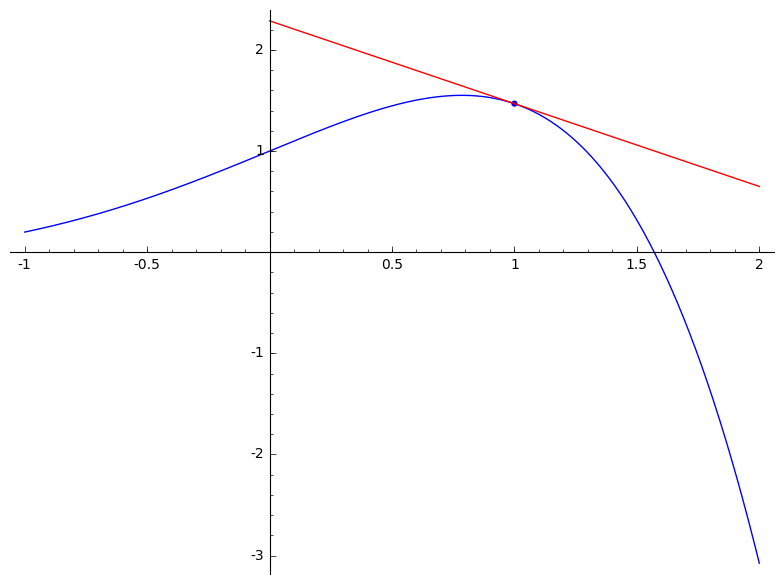

In [18]:
f(x) = exp(x) * cos(x)
G = plot(f, (x,-1,2))
df = f.derivative(x)
a = f(1)
b = df(1)
L = line2d([(0, a-b), (2, a+b)], color='red')
P = point2d((1,a), pointsize=20)
G + L + P

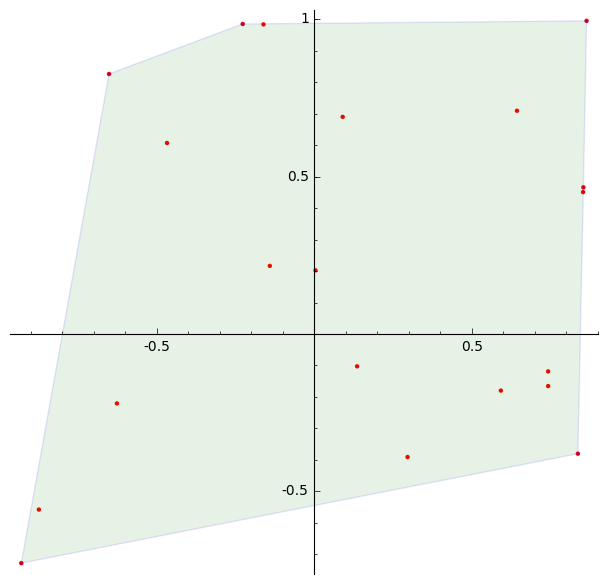

In [15]:
V = RR^2
pts = [V.random_element() for _ in range(20)]
P = Polyhedron(pts)
point2d(pts, color='red') + P.plot(alpha=0.1)

Going further
-------------

To continue you are advised to open the sage-notebook (via `$ sage --notebook=sagenb`) and have a look at the various thematic tutorials that will guide you. Once the sage-notebook is open, you need to click on the `Help` link (top right of the screen) and then select `Thematic Tutorials`.